(cfa-notebook)=
# Analisti Fattoriale Confermativa

In questo capitolo esamineremo la CFA per l'analisi dei modelli di misurazione con fattori comuni e indicatori continui. A differenza dell'analisi fattoriale esplorativa (EFA), nella CFA vengono analizzati modelli di misurazione vincolati. Ciò significa che il ricercatore specifica (1) il numero esatto di fattori; (2) il pattern dei carichi fattoriali, ossia la corrispondenza specifica tra i fattori e gli indicatori; e (3) la presenza di errori correlati, se presenti. La seconda caratteristica menzionata sopra implica che un indicatore satura solo sui fattori specificati dal ricercatore, e tutte le saturazioni incrociate di quell'indicatore su altri fattori sono fissate a zero. Sebbene sia possibile specificare un numero esatto di fattori nella EFA, la tecnica analizza modelli di misurazione non restrittivi, in cui ciascun indicatore satura su tutti i fattori (ossia tutte le saturazioni incrociate sono liberamente stimate). Un'altra differenza è che i modelli EFA con più fattori sono identificati solo dopo aver specificato un metodo di rotazione dei fattori, come obliqua (i fattori possono covariare) oppure ortogonale (i fattori sono non correlati). Poiché la CFA richiede un modello identificato, non c'è una fase di rotazione e di solito è permesso ai fattori di covariare. Nell'ambito dei requisiti per l'identificazione, è possibile stimare errori correlati nella CFA, ma è più difficile ottenere questo risultato nella EFA. Pertanto, la tecnica della CFA supporta meglio l'analisi delle strutture di covarianza degli errori rispetto alla EFA. 

In [1]:
source("../_common.R")
suppressPackageStartupMessages({
    library("lavaan")
    library("semTools")
})
set.seed(42)

## Limitazioni dell'approccio fattoriale

L'approccio classico dell'analisi fattoriale (EFA più rotazione fattoriale) ha rivelato avere diversi limiti. Questa tecnica, se usata incautamente, può produrre risultati contraddittori, rendendo difficile il test di modelli alternativi. Un errore comune è assumere che se due indicatori saturano sullo stesso fattore allora devono essere correlati, il che è un'assunzione errata.

Nella ricerca iniziale, dibattiti teorici importanti, come il numero di fattori dell'intelligenza o della personalità, erano basati sui risultati di diverse rotazioni fattoriali. Questi dibattiti si sono rivelati essere speculazioni, poiché conclusioni diverse potevano essere supportate a seconda dell'interpretazione dei dati. Per esempio, il dibattito tra Eysenck e Cattell sul numero di fattori della personalità (due o sedici) dipendeva dall'uso di rotazioni ortogonali o oblique sugli stessi dati.

Nella seconda metà del XX secolo, c'era una generale insoddisfazione verso l'analisi fattoriale a causa della sua apparente capacità di adattarsi a quasi qualsiasi soluzione. Furono raccomandati criteri rigorosi per il suo uso, come la necessità di grandi campioni, che spesso rendevano l'analisi impraticabile nei primi tempi. Inoltre, furono introdotti vincoli relativi alle ipotesi del modello e al requisito che le variabili nella matrice di correlazione avessero varianza equivalente, creando problemi pratici significativi, specialmente con dati binari spesso usati nei test psicometrici.

Solo con l'introduzione di metodi psicometrici moderni, come l'analisi fattoriale confermativa (CFA) discussa in questo capitolo e la Teoria di Risposta all'Item (discussa in una sezione successiva), questi problemi sono stati risolti. 

## EFA versus CFA

Sia la CFA che la EFA si basano sul modello dei fattori comuni. I due metodi condividono basi matematiche tali per cui i modelli restrittivi analizzati in CFA sono generati vincolando a zero i carichi incrociati nel corrispondente modello EFA per gli stessi indicatori e lo stesso numero di fattori. Questi vincoli identificano i modelli di misurazione restrittiva che vengono analizzati in CFA.

Entrambe le tecniche suddividono la varianza degli indicatori osservati in varianza comune e varianza unica. La varianza comune è condivisa tra gli indicatori ed è alla base delle covarianze osservate tra di essi. I fattori che approssimano le variabili latenti sono "costruiti" dalla varianza comune, e questi proxi vengono chiamati fattori comuni. Il numero di fattori di interesse sostanziale è di solito inferiore al numero di indicatori. È impossibile stimare più fattori comuni rispetto agli indicatori, ma per ragioni di parsimonia, non ha senso mantenere un modello con esattamente tante entità esplicative (fattori) quante ci sono entità da spiegare (indicatori). La varianza unica consiste nella varianza specifica e nell'errore di misurazione casuale. La varianza unica non è spiegata da nessun fattore comune nel modello. Può essere dovuta alle caratteristiche specifiche degli indicatori individuali, oppure alla varianza del metodo, ovvero l'uso di un particolare metodo di misurazione (ad esempio, l'autovalutazione) o di un informatore (ad esempio, i genitori) per ottenere i punteggi.

Un problema comune nel contesto della CFA e della EFA è quello dell'indeterminatezza fattoriale. L'indeterminatezza fattoriale si manifesta quando i fattori comuni non possono essere definiti in modo univoco in base ai loro rispettivi insiemi di indicatori. Questo fenomeno deriva dalla natura approssimativa con cui le variabili latenti vengono stimate utilizzando le variabili osservate.

In particolare, consideriamo un insieme di v variabili osservate (gli indicatori). Queste variabili sono utilizzate per approssimare un insieme di fattori comuni, di cui ci sono $m$ variabili latenti (fattori comuni) e $u$ varianze uniche degli indicatori. La somma di $v$, $m$ e $u$ è pari al totale delle variabili coinvolte. Tuttavia, il problema sorge perché non è possibile trasformare univocamente le $v$ variabili osservate in un numero ancora maggiore di variabili, ossia $v + m + u$ in totale, senza ambiguità.

Un aspetto cruciale dell'indeterminatezza fattoriale è evidente nella stima dei punteggi fattoriali per i casi individuali. Poiché esistono infinite modalità per generare questi punteggi a partire dagli indicatori, si verifica l'indeterminatezza dei punteggi fattoriali. Di conseguenza, non esiste una sola soluzione per la determinazione dei punteggi fattoriali, e diverse soluzioni possono condurre a ordinamenti diversi dei casi. Questo problema è noto come indeterminatezza dei punteggi fattoriali (Grice, 2001).

Un altro aspetto dell'indeterminatezza si riferisce all'indeterminatezza della rotazione nella EFA, che si verifica quando esistono insiemi infiniti di carichi fattoriali e correlazioni fattoriali che si adattano ugualmente bene ai dati in modelli con più fattori. Questa indeterminatezza si basa sulla flessibilità nella specificazione dei carichi fattoriali, che possono variare in modo infinito mantenendo un adattamento soddisfacente ai dati. Inoltre, va notato che i punteggi degli indicatori raramente rappresentano con esattezza le variabili latenti (ossia $r_{XX}$ < 1.0), il che introduce ulteriore incertezza nell'analisi fattoriale.

Mentre in un contesto con un numero infinito di indicatori in un campione infinitamente grande, l'indeterminatezza potrebbe essere evitata, tale scenario è impraticabile nella realtà. Di conseguenza, le variabili latenti, ovvero i fattori comuni, sono inevitabilmente stimate con un grado di incertezza, e questo rappresenta una sfida chiave nell'analisi fattoriale.

Poiché la EFA è meno impegnativa della CFA, può essere preferita nelle aree di ricerca più recenti in cui la teoria sulla misurazione è debole in termini del numero di concetti teorici che dovrebbero essere approssimati o della corrispondenza tra fattori comuni e indicatori. Le prime fasi nella costruzione di test psicologici o questionari, specialmente quando c'è relativamente poca guida dalla teoria, sono un contesto in cui la EFA è ben adatta. Ad esempio, se potrebbero esistere fattori inaspettati, ma sostanzialmente significativi, che sono fortemente correlati a sottoinsiemi di indicatori, allora la EFA sarebbe preferibile alla CFA, che è meno flessibile in questo caso (Flora & Flake, 2017).

Contrariamente al carattere basato sull'esplorazione dei dati della EFA, la tecnica CFA è utilizzata per valutare quanto bene una soluzione di fattore predefinita si adatta ai dati in un campione particolare. Un esempio sono le fasi successive nella costruzione di test che seguono analisi più preliminari con EFA in cui è stata stabilita la dimensionalità di base degli indicatori (Brown, 2015). Vale a dire, i risultati dalle applicazioni precedenti di EFA possono informare la specificazione dei modelli CFA in studi successivi di validazione del test con dati raccolti in nuovi campioni. La tecnica di CFA può anche essere utilizzata per valutare l'effetto della revisione di un test consolidato aggiungendo o rimuovendo indicatori, ad esempio se la struttura fattoriale originale nel test modificato è preservata nella revisione (Flora & Flake, 2017).

Un aspetto controverso per la CFA è la sua applicazione immediatamente dopo aver mantenuto un modello fattoriale in EFA con l'obiettivo di "verificare" o "confermare" in qualche modo i risultati della EFA. In questo caso, il modello CFA ha lo stesso numero di fattori del modello EFA, ma alcuni o tutti i carichi incrociati sono vincolati a zero nel modello CFA. Non vengono raccolti nuovi dati, quindi sia il modello EFA che il modello CFA vengono analizzati nello stesso campione. Ci sono due problemi qui: uno è che le due tecniche, EFA e CFA, potrebbero sfruttare la stessa variazione casuale in un campione specifico, specialmente se si utilizza lo stesso stimatore (ad esempio, massima verosimiglianza, ML) in entrambe le analisi. La domanda importante invece è se un qualsiasi modello CFA mantenuto in questa situazione possa replicarsi in un nuovo campione.

Un secondo problema è che la specifica di un modello CFA basato sui risultati della EFA e analizzato con gli stessi dati potrebbe portare al rifiuto del modello CFA. Ciò perché gli indicatori nella EFA spesso hanno carichi secondari relativamente elevati su fattori diversi da quello per il quale hanno il loro carico primario. Questi carichi secondari possono rappresentare proporzioni relativamente elevate di varianza, quindi vincolarli a zero in CFA potrebbe essere troppo conservativo. Di conseguenza, il modello CFA più restrittivo potrebbe essere incoerente con i dati. Inoltre, la specifica erronea di carichi incrociati a zero può portare a una sovrastima delle correlazioni tra i fattori (Asparouhov & Muthén, 2009). Una soluzione migliore è invece quella di cercare di riprodurre i risultati dell'analisi fattoriale, che sia EFA o CFA, in nuovi campioni. {cite:t}`kline2023principles` conclude che l'applicazione della CFA subito dopo la EFA nello stesso campione non verifica, conferma o replica in alcun modo i risultati della EFA (Flora & Flake, 2017).

Le etichette "esplorativo" versus "confermativo" (cioè EFA vs CFA) non dovrebbero essere reificate. È vero che la EFA non richiede ipotesi a priori sulla corrispondenza tra fattori e indicatori o persino sul numero di fattori. Ma ci sono anche modalità più confermatorie nella EFA, come istruire il computer a estrarre un numero specifico di fattori basato sulla teoria. Inoltre, la tecnica della CFA non è strettamente confermativa. Succede in molte, se non nella maggior parte, delle analisi che il modello iniziale dei fattori restrittivo non si adatti ai dati. In questo caso, il ricercatore modifica tipicamente le ipotesi su cui si basava il modello iniziale e specifica un nuovo modello, e il modello riprogettato viene quindi testato con gli stessi dati. Questo processo dovrebbe essere guidato dalla teoria, ma relativamente poche applicazioni della CFA sono strettamente confermatorie.

Esistono due metodi alternativi di analisi fattoriale che combinano caratteristiche della EFA e della CFA e quindi sono opzioni intermedie. Entrambi consentono una certa flessibilità nella EFA mentre aggiungono capacità per il test globale di adattamento o la specificazione delle covarianze degli errori. Nell'analisi strutturale esplorativa (ESEM) (Asparouhov & Muthén, 2009), il ricercatore specifica il numero esatto di fattori esattamente come in CFA, ma il modello di misurazione è non restrittivo nel senso che tutti i possibili carichi incrociati sono parametri liberi. Il modello è identificato attraverso la specifica di un'opzione di rotazione come nella EFA. Sono disponibili errori standard per i parametri stimati liberamente, così come le statistiche sul test di adattamento globale (ad esempio, chi-quadro del modello) e il test di adattamento locale (ad esempio, residui standardizzati). La tecnica era originariamente esclusiva di Mplus, ma ora può anche essere svolta con `R`. In conclusione, ESEM offre un approccio più flessibile rispetto alla CFA tradizionale, permettendo una maggiore esplorazione delle relazioni tra indicatori e fattori, simile a quella della EFA, ma con alcune restrizioni tipiche della CFA che aumentano la specificità e la chiarezza del modello. 

## Suggerimenti per la Selezione degli Indicatori

La selezione degli indicatori è fondamentale perché la qualità dei risultati nell'analisi fattoriale (CFA o EFA) dipende dalla qualità dei punteggi analizzati. Le raccomandazioni di {cite:t}`kline2023principles` sono riassunte di seguito (Fabrigar e Wegener, 2012; Little et al., 1999):

1. Definire i concetti teorici in dettaglio sufficiente in modo che la natura essenziale di ciascun dominio di interesse possa essere chiaramente delineata. Ad esempio, se l'obiettivo è delineare le dimensioni dell'ansia, consultare opere teoriche ed empiriche pertinenti sulla natura e sul numero di fattori, come ansia di stato, ansia di tratto, ansia sociale, e così via.

2. Successivamente, identificare gli indicatori candidati che, come insieme, campionano adeguatamente i vari domini. Idealmente, non tutti gli indicatori per lo stesso dominio dovrebbero fare affidamento sullo stesso metodo di misurazione, come ad esempio la valutazione solo attraverso questionari di autovalutazione. Ciò perché la varianza dovuta al metodo comune può influenzare i punteggi osservati al di sopra di qualsiasi influenza delle variabili latenti sostanziali. Modelli CFA speciali per stimare gli effetti del metodo sono descritti in un successivo capitolo.

3. Se c'è una forte guida dalla teoria o dai risultati degli studi empirici sulla selezione degli indicatori a priori, in questo caso, gli indicatori omogenei sono preferiti. Ciò perché le stime basate su indicatori altamente correlati (internamente coerenti) possono essere meno distorte e più efficienti nelle analisi che sono più confermatorie che esplorative.

4. Ma analizzare insiemi di indicatori meno omogenei che coprono una gamma più ampia del dominio di interesse può essere una scelta più sicura quando c'è relativamente poca guida sia dalla teoria che dalla ricerca sulla selezione degli indicatori. Un rischio è che approssimazioni nettamente definite basate su indicatori altamente correlati possono essere fuori bersaglio o non riflettere aspetti essenziali di un concetto. 

5. L'analisi di un insieme di indicatori con minore qualità psicometrica (ad esempio, minori affidabilità dei punteggi o consistenze interne) può produrre stime approssimativamente accurate se (a) campionano una parte sufficientemente ampia del costrutto, (b) generano punteggi che coprono gamme più ampie di differenze individuali e (c) sono analizzati con metodi più confermatori che esplorativi.

6. I problemi tecnici nell'analisi, come i casi Heywood o il fallimento della convergenza nella stima iterativa, sono più probabili se alcuni fattori hanno un numero insufficiente di indicatori, specialmente in campioni ridotti per fattori con solo due indicatori. Un numero minimo sicuro è di circa 3-5 indicatori per ciascun fattore previsto. Ad esempio, se si ipotizzano quattro dimensioni soggiacenti in totale, il numero minimo di indicatori candidati sarebbe di circa 12-20. Possibili eccezioni a questa prassi di ≥ 3 indicatori/fattore sono spiegate di seguito. Hayduk e Littvay (2012) hanno descritto situazioni in cui avere più indicatori per fattore non è necessariamente migliore di averne pochi, compreso l'uso di indicatori singoli. Ad esempio, se solo 1 dei 3 indicatori candidati per lo stesso fattore ha buone caratteristiche psicometriche, potrebbe essere meglio omettere i 2 indicatori più deboli, che potrebbero diluire o contaminare le stime per il miglior indicatore singolo. Se diversi indicatori sono altamente ridondanti, non si ottiene molta informazione aggiuntiva oltre all'analisi di un singolo indicatore dello stesso costrutto. La specifica predefinita di un numero minimo di indicatori multipli, come 3-5 per fattore, come una "regola d'oro", limita il numero di fattori stimati. Al contrario, fare affidamento su indicatori più limitati per fattore, compresi indicatori singoli, consente la specifica di variabili latenti aggiuntive, dato lo stesso numero di indicatori. Questi concetti aggiunti potrebbero consentire un controllo statistico più efficace per i problemi del confondimento o la stima di effetti indiretti. L'importante è che non esiste un numero magico di indicatori per fattore: la selezione degli indicatori dovrebbe essere guidata dalle ipotesi del ricercatore, non una regola arbitraria per un numero minimo (ad esempio, ≥ 3 indicatori/fattore).

## Modelli di Base nella CFA

Le caratteristiche dei modelli CFA di base con più fattori sono riassunte di seguito:
1. Ciascun indicatore è continuo con due cause: un fattore comune che approssima la variabile latente che l'indicatore è supposto misurare e tutte le fonti di varianza unica -- errore di misurazione casuale e varianza specifica non spiegata dal fattore -- rappresentate dal termine di errore.
2. I termini di errore sono indipendenti tra loro e dai fattori; cioè, non ci sono confondenti non misurati per nessuna coppia di indicatori, e tutte le cause omesse non sono correlate ai fattori.
3. Tutte le relazioni sono lineari e i fattori covariano (cioè non ci sono effetti causali tra nessuna coppia di fattori).

Le prime due caratteristiche elencate specificano la misurazione unidimensionale, ovvero l'ipotesi che ciascun indicatore misuri una singola dimensione e non condivida nulla con gli altri indicatori dopo il controllo dei fattori comuni. È anche possibile specificare modelli CFA per la misurazione multidimensionale in cui alcuni indicatori saturano su più di un fattore o coppie di termini di errore sono specificati come correlati. Inoltre, esistono metodi speciali di analisi fattoriale per stimare relazioni non lineari tra fattori e indicatori continui o tra fattori stessi (Amemiya e Yalcin, 2001). Le relazioni tra indicatori categorici e fattori sono intrinsecamente non lineari, e la tecnica del CFA categoriale è descritta in un successivo capitolo.

Nella {numref}`kline-14-1-fig` è presentato un modello CFA di base con due fattori e sei indicatori. Tutti i carichi incrociati sono fissati a zero. Ad esempio, non c'è un effetto causale diretto dal fattore B all'indicatore X1, che è specificato come misura dell'altro fattore (cioè, A → X1). Tuttavia, questa specificazione non implica che X1 e il fattore B siano non correlati. Al contrario, il percorso aperto nel modello, o X1 ← A B, prevede che l'indicatore X1 e il fattore B dovrebbero covariare perché B è correlato con A, una causa di X1 (l'altra causa è E1, il suo termine di errore), ma questa associazione non è causale. Allo stesso modo, si prevede che gli indicatori X1 e X4 nella figura covarino perché le loro rispettive cause, i fattori A e B, sono correlate, o X1 ← A B → X4, e questo è vero anche se X1 e X4 si presume misurino cose diverse.

I valori (1) nella {numref}`kline-14-1-fig` sono costanti di scala che specificano metriche per variabili non misurate, che nei modelli CFA includono fattori comuni e termini di errore degli indicatori. 

```{figure} ../images/kline_14_1.png
---
height: 300px
name: kline-14-1-fig
---
Modello di analisi fattoriali confermativa con due fattori comuni e sei indicatori. (Figura tratta da {cite:t}`kline2023principles`)
```

Ogni fattore nella {numref}`kline-14-1-fig` è scalato attraverso il metodo della variabile di riferimento -- anche chiamato metodo della variabile marker o approccio di identificazione del carico di riferimento (Newsom, 2015) — dove un vincolo ULI è imposto sul carico di un indicatore per fattore. Ad esempio, la specificazione A → X1 = 1.0 nella figura scala la varianza del fattore A nella metrica della varianza comune (spiegata) dell'indicatore X1, la variabile di riferimento per il fattore A. Con la stessa logica, il computer stima la varianza del fattore B nella metrica della varianza comune in X4, la variabile marker per questo fattore. 

Se più indicatori per lo stesso fattore hanno punteggi ugualmente precisi e nessuno è considerato rappresentativo in modo critico del concetto sottostante, allora è generalmente arbitrario nelle analisi a campione singolo quale indicatore è selezionato come variabile di riferimento. Questo perché la scelta non influisce tipicamente su (1) l'adattamento globale del modello, (2) la soluzione standardizzata, o (3) le stime delle varianze di errore dell'indicatore nella soluzione non standardizzata. Le saturazioni delle variabili di riferimento fissate a 1.0 rimangono tali nella soluzione non standardizzata e non hanno errori standard perché sono costanti, non variabili. Ciò significa che non c'è un test di significatività per le saturazioni fisse delle variabili di riferimento -- il che potrebbe essere un possibile svantaggio del metodo se si desidera un test di significatività per tutte le saturazioni non standardizzate. Altre opzioni per scalare i fattori che non richiedono la selezione di variabili di riferimento sono descritte nella sezione successiva.

Tutti i fattori nei modelli CFA di base sono variabili esogene che sono libere di variare e covariare tra di loro senza essere influenzati da altre variabili. Tuttavia, è possibile che ci siano variabili esterne, chiamate covariate, che si ritiene possano influenzare i fattori comuni. Ad esempio, potremmo pensare che l'età dei partecipanti a uno studio possa influenzare i fattori comuni misurati da un modello CFA. In tal caso, possiamo includere l'età come covariata nel modello CFA. Quando facciamo ciò, stiamo effettivamente considerando l'età come una causa potenziale dei fattori comuni, il che significa che stiamo permettendo all'età di influenzare direttamente i fattori comuni nel nostro modello.

Quando includiamo covariate, dobbiamo trattare i fattori comuni in modo diverso. Le covariate vengono considerate come cause dei fattori comuni, il che significa che l'età (o qualsiasi altra covariata) può influenzare direttamente i fattori comuni. Questo porta a considerare i fattori comuni come variabili endogene nel modello, il che significa che ora non sono più liberi di variare completamente in modo indipendente, ma possono essere influenzati dalle covariate. Per catturare questo effetto delle covariate sui fattori comuni, includiamo termini di disturbo nei fattori comuni per rappresentare l'effetto diretto delle covariate su di essi.

### Parametri del Modello nella CFA 

I parametri liberi dei modelli CFA con indicatori continui, quando le medie non sono analizzate, includono le varianze e le covarianze delle variabili esogene e gli effetti diretti sulle variabili endogene. Per esempio, per il modello base nella {numref}`kline-14-1-fig`, i parametri liberi includono:

1. 8 varianze: queste comprendono le varianze di 2 fattori e dei 6 termini di errore degli indicatori.
2. 1 covarianza: questa è la covarianza tra i 2 fattori.
3. 4 effetti diretti dei fattori sugli indicatori (carichi): questi sono i carichi che non sono stati fissati per scalare i fattori (ovvero, i carichi per X2-X3 e X5-X6).

Il totale complessivo dei parametri liberi è quindi 13. Con $v$ = 6 variabili osservate, il numero totale di osservazioni quando le medie non sono analizzate è 6(7)/2, ovvero 21, quindi i gradi di libertà del modello rappresentato nella {numref}`kline-14-1-fig` sono 21 – 13 = 8.

#### Requisiti di Identificazione Necessari ma Non Sufficienti 

Per garantire che un modello di CFA sia correttamente specificato e possa essere utilizzato per trarre conclusioni valide, è essenziale soddisfare due requisiti fondamentali di identificazione. Questi requisiti sono considerati necessari ma non sufficienti, il che significa che, anche se soddisfatti, potrebbero non essere adeguati da soli per assicurare l'identificazione completa del modello. 

1. **Gradi di Libertà (dfM) Maggiori o Uguali a Zero**: 
   
   - **Calcolo dei Gradi di Libertà**: I gradi di libertà di un modello CFA sono calcolati sottraendo il numero di parametri liberi (ad esempio, varianze, covarianze, carichi fattoriali) dal numero totale di osservazioni indipendenti nei dati. Le osservazioni indipendenti sono tipicamente rappresentate dalle varianze e covarianze degli indicatori osservati. 
   - **Significato dei Gradi di Libertà**: Un numero positivo di gradi di libertà indica che ci sono abbastanza dati per stimare i parametri del modello e per testare l'adattamento del modello stesso. Se i gradi di libertà sono zero, il modello è detto "saturato", il che significa che si adatterà perfettamente ai dati ma senza fornire informazioni utili per la validazione. 
   - **Importanza dei Gradi di Libertà**: Avere dfM ≥ 0 è fondamentale perché assicura che il modello non sia sottospecificato. Un modello sottospecificato potrebbe portare a stime inaccurate e conclusioni fuorvianti.

2. **Scalatura di Ogni Variabile Non Misurata**: 
   
   - **Necessità della Scalatura**: Ogni variabile latente in un modello CFA, come un fattore, deve essere scalata per definirne l'unità di misura. Fissare la scala delle variabili latenti è cruciale perché senza di essa, i parametri del modello, come i carichi fattoriali, rimarrebbero indeterminati. 
   - **Metodi di Scalatura**: La scalatura può essere realizzata in tre modi: fissando il carico di un indicatore per fattore a 1.0 (metodo di riferimento), o fissando la varianza del fattore a un valore specifico, di solito 1.0 (metodo della standardizzazione della varianza), o imponendo dei vincoli sulle stime delle saturazioni fattoriali (metodo di codifica degli effetti). 

In conclusione, la soddisfazione di questi due requisiti è fondamentale per stabilire un modello CFA di base che sia identificabile e interpretabile. Tuttavia, l'identificazione completa del modello potrebbe richiedere ulteriori considerazioni basate sulla specifica struttura e sulle ipotesi teoriche sottostanti il modello.

```{figure} ../images/kline_14_2.png
---
height: 500px
name: kline-14-2-fig
---
Scalatura dei fattori nel metodo della variabile di riferimento con vincoli di identificazione del carico unitario (ULI) (a), metodo di standardizzazione della variabile con vincoli di identificazione della varianza unitaria (UVI) (b) e metodo di codifica degli effetti con vincoli di identificazione della codifica degli effetti (ECI) (a + b + c)/3 = (d + e + f)/3 = 1.0 (c).  (Figura tratta da {cite:t}`kline2023principles`)
```

#### Requisiti Sufficienti Aggiuntivi per l'Identificazione

Oltre ai requisiti base, ci sono ulteriori criteri che contribuiscono all'identificazione dei modelli CFA:

1. **Regola dei Tre Indicatori per i Modelli a Singolo Fattore**: Un modello CFA con un solo fattore deve avere almeno tre indicatori per essere identificato. Questo perché con solo due indicatori, c'è una mancanza di informazione sufficiente per distinguere la varianza e i carichi specifici del fattore da quelli degli errori di misurazione. Tuttavia, un modello con solo tre indicatori avrebbe esattamente zero gradi di libertà, il che significa che si adatterebbe perfettamente ai dati ma non fornirebbe informazioni utili per ulteriori test o validazioni. Quindi, per avere gradi di libertà positivi (dfM > 0) e quindi spazio per la validazione del modello, sarebbero necessari almeno quattro indicatori -- si ricordi il metodo dell'annullamento della tetrade.

2. **Regola dei Due Indicatori per i Modelli con Più Fattori**: Se un modello CFA ha due o più fattori, ciascun fattore deve avere almeno due indicatori. Questa regola aiuta a garantire che ogni fattore sia sufficientemente definito e differenziato dagli altri fattori nel modello. Tuttavia, i modelli con solo due indicatori per fattore possono essere problematici, specialmente in campioni piccoli, a causa di potenziali instabilità nelle stime e difficoltà nell'interpretazione.

In sintesi, questi requisiti di identificazione sono cruciali per garantire che un modello CFA sia teoricamente significativo (attraverso una corretta scalatura delle variabili latenti) e praticamente utile (avendo abbastanza gradi di libertà per permettere la validazione e l'interpretazione del modello). 

#### Altri Metodi per la Scalatura dei Fattori 

La scalatura dei fattori in un modello di CFA è cruciale per assicurare la corretta identificazione e interpretazione dei fattori. Oltre al metodo della variabile di riferimento, ci sono altri due approcci principali per la scalatura dei fattori. Ecco una spiegazione più dettagliata di questi metodi:

1. **Metodo di Standardizzazione della Varianza (Variance Standardization Method)**:
   
   - **Standardizzazione dei Fattori**: Questo metodo standardizza i fattori fissando le loro varianze a 1.0. Questo vincolo è noto come *unit variance identification* (UVI). 
   - **Implicazioni**: Poiché i fattori sono standardizzati, le loro varianze non sono parametri liberi, ma le covarianze dei fattori sono liberamente stimate come correlazioni di Pearson. 
   - **Carichi degli Indicatori**: In questo metodo, i carichi di tutti gli indicatori sono parametri liberi, il che significa che ogni carico ha un errore standard nella soluzione non standardizzata e può essere testato per la significatività statistica. 
   - **Vantaggi e Limitazioni**: Questo approccio ha il vantaggio della semplicità e non richiede la selezione di variabili di riferimento. Tuttavia, è generalmente applicabile solo ai fattori esogeni.

2. **Metodo di Codifica degli Effetti (Effects Coding Method)**:
   
   - **Principio di Funzionamento**: Questo metodo non richiede la selezione di variabili di riferimento e non standardizza i fattori. Si basa sulla capacità degli strumenti SEM moderni di imporre vincoli lineari su due o più stime dei parametri, in questo caso sui carichi non standardizzati per gli indicatori di un fattore comune.
   - **Vincolo di Codifica degli Effetti (ECI)**: Si specifica un vincolo ECI, il che significa che il carico medio degli indicatori dello stesso fattore equivale a 1.0 nella soluzione non standardizzata. Questo istruisce il computer a derivare carichi ottimali per un set di indicatori che in media sono 1.0.
   - **Stima della Varianza del Fattore**: Con questo approccio, la varianza del fattore è stimata come la varianza comune media attraverso tutti gli indicatori nella loro metrica originale, ponderata dal contributo di ciascun indicatore alla misurazione del fattore.
   - **Vantaggi**: Tutti gli indicatori contribuiscono alla scala del loro fattore comune. Questo può essere particolarmente utile in studi dove le varianze dei fattori forniscono informazioni sostanziali, come negli studi longitudinali sui fattori di crescita latente o quando si confrontano campioni da diverse popolazioni su fattori che sottostanno agli esiti osservati.

La scelta tra questi metodi dipende dall'obiettivo della ricerca e dalle specifiche del modello CFA. Ogni metodo ha vantaggi e limitazioni:

- Il **metodo di standardizzazione della varianza** è semplice e non richiede la selezione di variabili di riferimento, ma è più adatto per fattori esogeni e può non essere appropriato in tutte le situazioni.
- Il **metodo di codifica degli effetti** offre una stima più stabile della varianza del fattore che non si basa su un singolo indicatore, rendendolo utile in situazioni dove le varianze dei fattori sono di particolare interesse.

Importante notare che la scelta del metodo di scalatura non influisce sull'adattamento globale del modello, sulla soluzione standardizzata e sulle stime non standardizzate per i termini di errore. Tuttavia, le stime non standardizzate per altri parametri del modello dipendono dal metodo scelto. La decisione su quale metodo utilizzare dovrebbe essere guidata dalla natura dei dati, dagli obiettivi della ricerca e dalle specifiche teoriche del modello CFA impiegato.

## Esempio di CFA per un Modello di Abilità Cognitive

La Kaufman Assessment Battery for Children (KABC-I) è un test di abilità cognitive somministrato individualmente per bambini dai 2 anni e mezzo ai 12 anni e mezzo (Kaufman & Kaufman, 1983). Gli autori del test ritengono che gli otto indicatori rappresentati nella {ref}`kline-14-3-fig` misurano due fattori. Si ritiene che tre compiti, che riflettono l'elaborazione sequenziale, richiedono il richiamo di stimoli uditivi (Richiamo Numerico, Ordine delle Parole) o visivi (Movimenti della Mano) in un ordine particolare. Gli altri cinque compiti — dalla Chiusura Gestaltica alla Serie Fotografica nella figura — si presume misurino un ragionamento più olistico, meno dipendente dall'ordine, o un'elaborazione simultanea. Keith (1985) ha suggerito nomi alternativi per i fattori della KABC-I, tra cui "memoria a breve termine" invece di "elaborazione sequenziale" e "ragionamento visuo-spaziale" invece di "elaborazione simultanea".

In [2]:
# input the correlations in lower diagnonal form
kabcLower.cor <- "
 1.00
 .39 1.00
 .35  .67 1.00
 .21  .11  .16 1.00
 .32  .27  .29  .38 1.00
 .40  .29  .28  .30  .47 1.00
 .39  .32  .30  .31  .42  .41 1.00
 .39  .29  .37  .42  .58  .51  .42 1.00 "

# name the variables and convert to full correlation matrix
# hm, hand movements; nr, number recall; wo, word order; gc, gestalt closure;
# tr, triangles; sm, spatial memory; ma, matrix analogies; ps, photo series
kabc.cor <- lavaan::getCov(kabcLower.cor, names = c(
    "hm", "nr", "wo",
    "gc", "tr", "sm", "ma", "ps"
))
# display correlations
kabc.cor

,hm,nr,wo,gc,tr,sm,ma,ps
hm,1.00,0.39,0.35,0.21,0.32,0.40,0.39,0.39
nr,0.39,1.00,0.67,0.11,0.27,0.29,0.32,0.29
wo,0.35,0.67,1.00,0.16,0.29,0.28,0.30,0.37
gc,0.21,0.11,0.16,1.00,0.38,0.30,0.31,0.42
tr,0.32,0.27,0.29,0.38,1.00,0.47,0.42,0.58
sm,0.40,0.29,0.28,0.30,0.47,1.00,0.41,0.51
ma,0.39,0.32,0.30,0.31,0.42,0.41,1.00,0.42
ps,0.39,0.29,0.37,0.42,0.58,0.51,0.42,1.00


In [3]:
# add the standard deviations and convert to covariances
kabc.cov <- lavaan::cor2cov(kabc.cor, sds = c(3.40, 2.40, 2.90, 2.70, 2.70, 4.20, 2.80, 3.00))

# display covariances
kabc.cov

,hm,nr,wo,gc,tr,sm,ma,ps
hm,11.5600,3.1824,3.4510,1.9278,2.9376,5.7120,3.7128,3.978
nr,3.1824,5.7600,4.6632,0.7128,1.7496,2.9232,2.1504,2.088
wo,3.4510,4.6632,8.4100,1.2528,2.2707,3.4104,2.4360,3.219
gc,1.9278,0.7128,1.2528,7.2900,2.7702,3.4020,2.3436,3.402
tr,2.9376,1.7496,2.2707,2.7702,7.2900,5.3298,3.1752,4.698
sm,5.7120,2.9232,3.4104,3.4020,5.3298,17.6400,4.8216,6.426
ma,3.7128,2.1504,2.4360,2.3436,3.1752,4.8216,7.8400,3.528
ps,3.9780,2.0880,3.2190,3.4020,4.6980,6.4260,3.5280,9.000


```{figure} ../images/kline_14_3.png
---
height: 250px
name: kline-14-3-fig
---
Modello CFA per la Kaufman Assessment Battery for Children. (Figura tratta da {cite:t}`kline2023principles`)
```

#### Modello a Fattore Singolo

Nell'ambito della CFA, se il modello bersaglio ha due o più fattori, spesso il primo modello analizzato è un modello a fattore singolo. Se non si può rigettare un modello a fattore singolo, non ha molto senso valutare modelli con più fattori.

Specifichiamo il modello ad un fattore comune nella sintassi di `lavaan`.

In [4]:
# single factor (general ability)
# indicator hm automatically specified as reference variable
kabc1.model <- "
    General =~ hm + nr + wo + gc + tr + sm + ma + ps 
"

Adattiamo il modello ai dati.

In [5]:
# variances calculated with N in the denominator, not N - 1
kabc1 <- lavaan::sem(kabc1.model, sample.cov = kabc.cov, sample.nobs = 200)

Generiamo un modello di percorso.

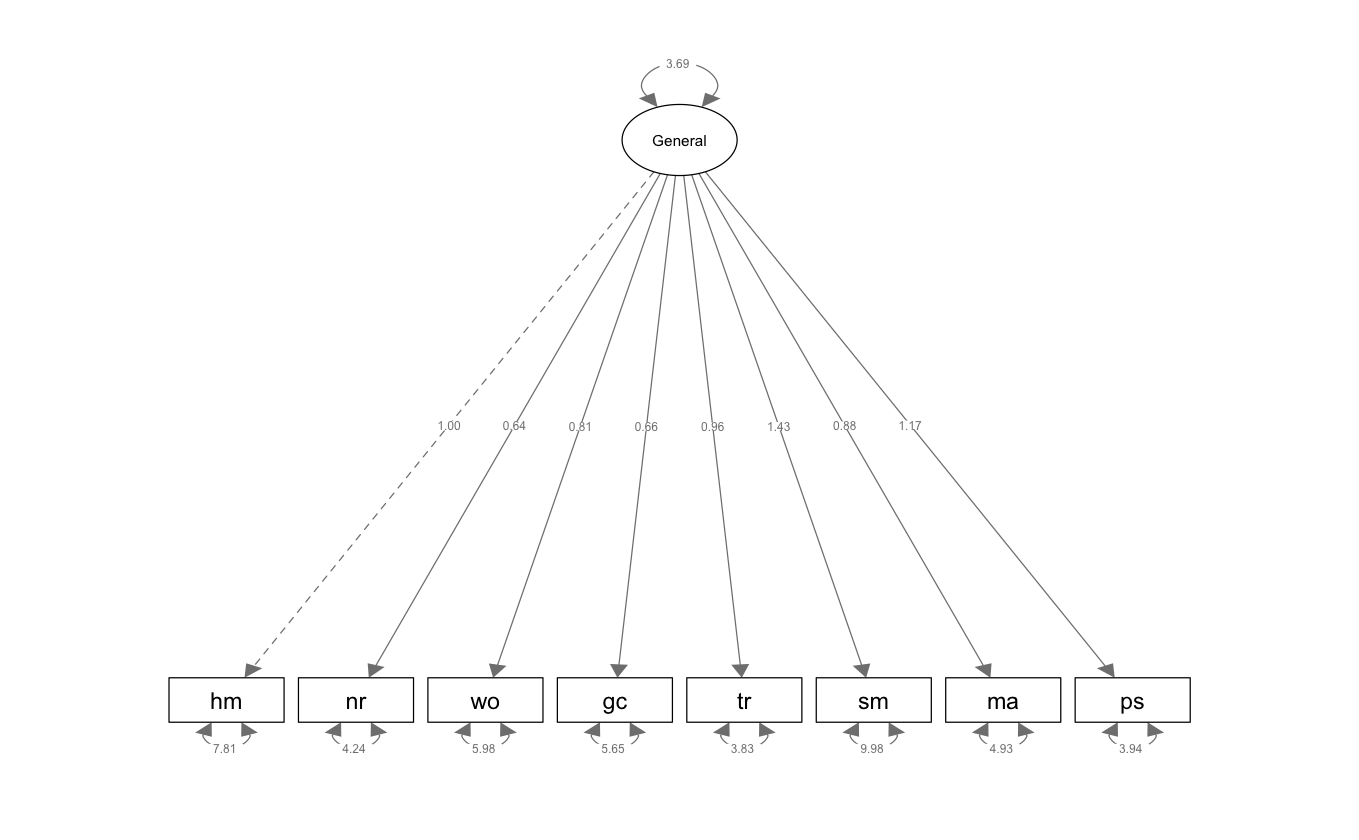

In [6]:
semPlot::semPaths(kabc1,
    what = "col", whatLabels = "par", style = "mx", 
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

Esaminiamo la soluzione non standardizzata.

In [7]:
lavaan::parameterEstimates(kabc1) |> 
    print()

       lhs op     rhs   est    se     z pvalue ci.lower ci.upper
1  General =~      hm 1.000 0.000    NA     NA    1.000    1.000
2  General =~      nr 0.636 0.111 5.708      0    0.418    0.854
3  General =~      wo 0.805 0.136 5.910      0    0.538    1.072
4  General =~      gc 0.659 0.123 5.361      0    0.418    0.900
5  General =~      tr 0.963 0.138 6.984      0    0.693    1.233
6  General =~      sm 1.433 0.211 6.796      0    1.019    1.846
7  General =~      ma 0.883 0.137 6.459      0    0.615    1.151
8  General =~      ps 1.166 0.159 7.324      0    0.854    1.478
9       hm ~~      hm 7.812 0.863 9.049      0    6.120    9.504
10      nr ~~      nr 4.240 0.456 9.294      0    3.345    5.134
11      wo ~~      wo 5.975 0.650 9.195      0    4.702    7.249
12      gc ~~      gc 5.652 0.599 9.432      0    4.478    6.827
13      tr ~~      tr 3.831 0.468 8.186      0    2.914    4.748
14      sm ~~      sm 9.979 1.179 8.463      0    7.668   12.290
15      ma ~~      ma 4.9

La saturazione non standardizzata per il compito "Movimenti della Mano" è stato fissato automaticamente a 1.0 per scalare il singolo fattore comune. Le istruzioni seguenti consentono di estrarre dall'output di `sem()` solo le informazioni relative alle saturazioni fattoriali.

In [8]:
parameterEstimates(kabc1, standardized = TRUE) %>%
    dplyr::filter(op == "=~") %>%
    dplyr::select(
        "Latent Factor" = lhs,
        Indicator = rhs,
        B = est,
        SE = se,
        Z = z,
        "p-value" = pvalue,
        Beta = std.all
    ) %>%
    knitr::kable(
        digits = 3, booktabs = TRUE, format = "markdown",
        caption = "Factor Loadings"
    )



Table: Factor Loadings

|Latent Factor |Indicator |     B|    SE|     Z| p-value|  Beta|
|:-------------|:---------|-----:|-----:|-----:|-------:|-----:|
|General       |hm        | 1.000| 0.000|    NA|      NA| 0.566|
|General       |nr        | 0.636| 0.111| 5.708|       0| 0.510|
|General       |wo        | 0.805| 0.136| 5.910|       0| 0.535|
|General       |gc        | 0.659| 0.123| 5.361|       0| 0.470|
|General       |tr        | 0.963| 0.138| 6.984|       0| 0.687|
|General       |sm        | 1.433| 0.211| 6.796|       0| 0.657|
|General       |ma        | 0.883| 0.137| 6.459|       0| 0.607|
|General       |ps        | 1.166| 0.159| 7.324|       0| 0.749|

Esaminiamo le misure di bontà di adattamento.

In [9]:
fitMeasures(kabc1, c("chisq", "df", "cfi", "tli", "rmsea", "srmr")) |>
    print()

  chisq      df     cfi     tli   rmsea    srmr 
105.427  20.000   0.818   0.746   0.146   0.084 


Troviamo i residui grezzi, ovvero la differenza tra la matrice di covarianza osservata e quella predetta dal modello.

In [10]:
lavaan::residuals(kabc1, type = "raw") |>
    print()

$type
[1] "raw"

$cov
       hm     nr     wo     gc     tr     sm     ma     ps
hm  0.000                                                 
nr  0.820  0.000                                          
wo  0.462  2.751  0.000                                   
gc -0.513 -0.836 -0.711  0.000                            
tr -0.631 -0.519 -0.602  0.415  0.000                     
sm  0.397 -0.452 -0.863 -0.097  0.212  0.000              
ma  0.437  0.069 -0.199  0.186  0.022  0.131  0.000       
ps -0.345 -0.659 -0.263  0.550  0.530  0.229 -0.289  0.000



Specificando `type = "cor.bollen"` o `type = "cor"` otteniamo la differenza tra la matrice di correlazione osservata e quella predetta dal modello.

In [11]:
lavaan::residuals(kabc1, type = "cor.bollen") |>
    print()

$type
[1] "cor.bollen"

$cov
       hm     nr     wo     gc     tr     sm     ma     ps
hm  0.000                                                 
nr  0.101  0.000                                          
wo  0.047  0.397  0.000                                   
gc -0.056 -0.130 -0.091  0.000                            
tr -0.069 -0.080 -0.077  0.057  0.000                     
sm  0.028 -0.045 -0.071 -0.009  0.019  0.000              
ma  0.046  0.010 -0.025  0.025  0.003  0.011  0.000       
ps -0.034 -0.092 -0.030  0.068  0.066  0.018 -0.035  0.000



In alternativa, possiamo ottenere i residui standardizzati alla maniera di Mplus (`standardized.mplus`), che vengono calcolati utilizzando la seguente formula:

$$
    \text{Residuo Standardizzato} = \frac{\text{Cov. Osservata} - \text{Cov. Stimata}}{\sqrt{\text{Var. dell'Errore per X} \times \text{Var. dell'Errore per Y}}}, 
$$

dove:
- La covarianza osservata è il valore della covarianza tra due variabili nel set di dati.
- La covarianza stimata è la covarianza tra le stesse due variabili, come previsto dal modello SEM.
- La varianza dell'errore per la variabile X e Y sono le varianze degli errori per le due variabili in questione.

I residui standardizzati misurano quanto la relazione osservata tra due variabili si discosta da quella prevista dal modello, in unità standardizzate. Un valore vicino a zero indica che il modello si adatta bene ai dati per quella specifica relazione. Valori più grandi in valore assoluto suggeriscono un cattivo adattamento in quella specifica parte del modello.

In [12]:
lavaan::residuals(kabc1, type = "standardized.mplus") |>
    print()

$type
[1] "standardized.mplus"

$cov
       hm     nr     wo     gc     tr     sm     ma     ps
hm  0.000                                                 
nr  2.062  0.000                                          
wo  1.026  6.218  0.000                                   
gc -1.231 -2.727 -1.952  0.000                            
tr -2.200 -2.364 -2.355  1.379  0.000                     
sm  0.723 -1.188 -1.995 -0.210  0.596  0.000              
ma  1.086  0.237 -0.601  0.544  0.089  0.313  0.000       
ps -1.241 -3.422 -1.037  1.833  2.178  0.675 -1.375  0.000



Il modello a fattore singolo mostra un rapporto elevato chi-quadro/df. Inoltre, i residui per questa analisi indicano che l'adattamento locale è scadente. Pertanto, il modello a fattore singolo per la KABC-I è rigettato.

#### Modello a Due Fattori

In una seconda analisi, adattiamo ai dati il modello a due fattori rappresentato nella {numref}`kline-14-3-fig`. 

In [13]:
kabc2_model <- "
    Sequent =~ hm + nr + wo
    Simultan =~ gc + tr + sm + ma + ps 
"

In [14]:
kabc2 <- lavaan::sem(kabc2_model, sample.cov = kabc.cov, sample.nobs = 200)

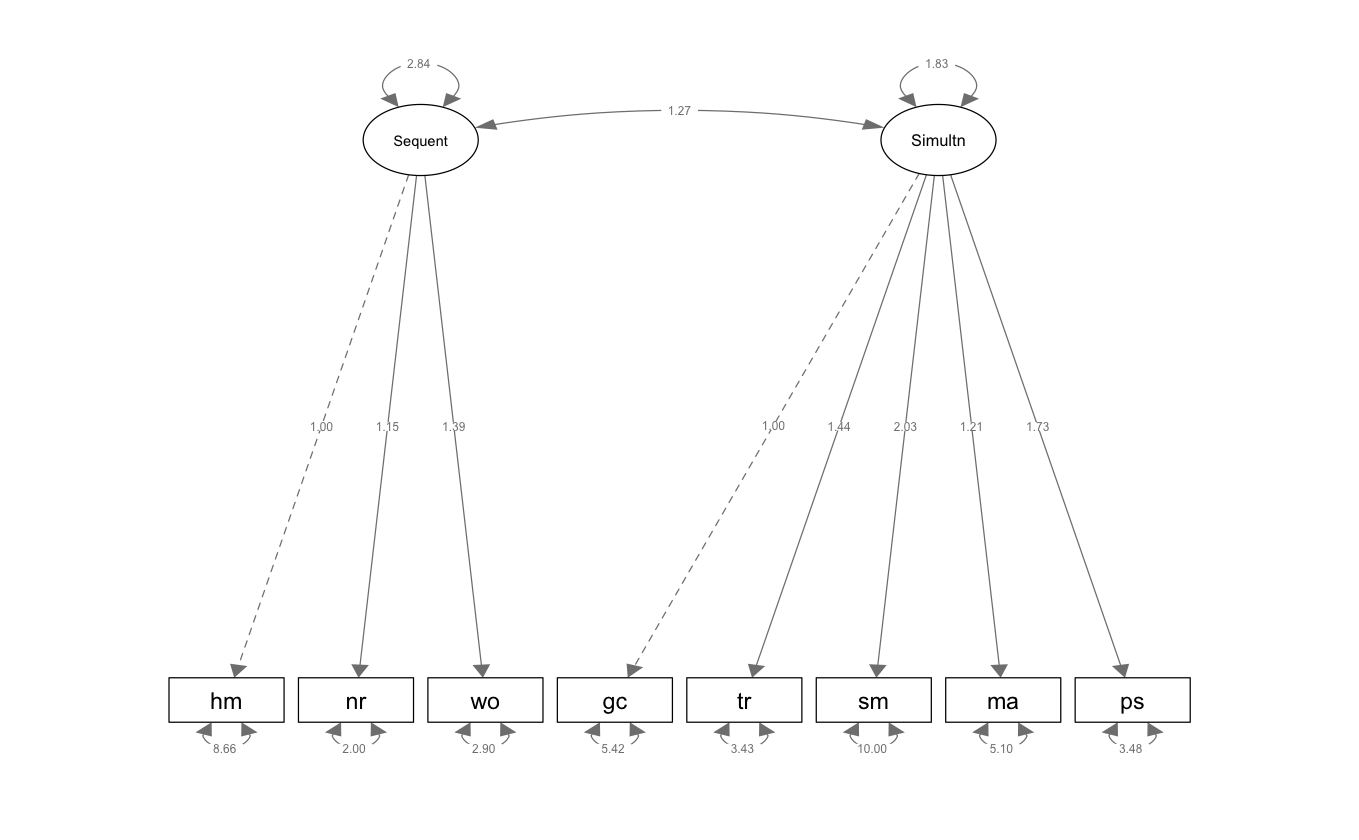

In [15]:
semPlot::semPaths(kabc2,
    what = "col", whatLabels = "par", style = "mx", 
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

In [16]:
lavaan::parameterEstimates(kabc2) |>
    print()

        lhs op      rhs   est    se     z pvalue ci.lower ci.upper
1   Sequent =~       hm 1.000 0.000    NA     NA    1.000    1.000
2   Sequent =~       nr 1.147 0.181 6.341  0.000    0.792    1.501
3   Sequent =~       wo 1.388 0.219 6.340  0.000    0.959    1.817
4  Simultan =~       gc 1.000 0.000    NA     NA    1.000    1.000
5  Simultan =~       tr 1.445 0.227 6.352  0.000    0.999    1.890
6  Simultan =~       sm 2.029 0.335 6.062  0.000    1.373    2.685
7  Simultan =~       ma 1.212 0.212 5.717  0.000    0.797    1.628
8  Simultan =~       ps 1.727 0.265 6.521  0.000    1.208    2.246
9        hm ~~       hm 8.664 0.938 9.237  0.000    6.826   10.502
10       nr ~~       nr 1.998 0.414 4.831  0.000    1.188    2.809
11       wo ~~       wo 2.902 0.604 4.801  0.000    1.717    4.087
12       gc ~~       gc 5.419 0.585 9.261  0.000    4.272    6.566
13       tr ~~       tr 3.426 0.458 7.479  0.000    2.528    4.323
14       sm ~~       sm 9.997 1.202 8.320  0.000    7.642   12

In [17]:
standardizedSolution(kabc2)

lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sequent,=~,hm,0.4967517,0.06185190,8.031309,8.881784e-16,0.3755242,0.6179792
Sequent,=~,nr,0.8070386,0.04626958,17.442098,0.000000e+00,0.7163519,0.8977253
Sequent,=~,wo,0.8082004,0.04624070,17.478118,0.000000e+00,0.7175703,0.8988305
Simultan,=~,gc,0.5029005,0.06088027,8.260485,2.220446e-16,0.3835774,0.6222236
Simultan,=~,tr,0.7264627,0.04412957,16.462040,0.000000e+00,0.6399703,0.8129550
Simultan,=~,sm,0.6560490,0.04959951,13.226925,0.000000e+00,0.5588358,0.7532623
Simultan,=~,ma,0.5878905,0.05485948,10.716298,0.000000e+00,0.4803679,0.6954131
Simultan,=~,ps,0.7817406,0.04012341,19.483401,0.000000e+00,0.7031001,0.8603810
hm,~~,hm,0.7532377,0.06145007,12.257719,0.000000e+00,0.6327978,0.8736777


In [18]:
fitMeasures(kabc2, c("chisq", "df", "cfi", "tli", "rmsea", "srmr")) |>
    print()

 chisq     df    cfi    tli  rmsea   srmr 
38.325 19.000  0.959  0.939  0.071  0.072 


Un modello di analisi dei fattori confermativi (CFA) che impiega un singolo fattore può essere considerato come un caso particolare, o un "sottoinsieme", di modelli CFA con due o più fattori che utilizzano gli stessi indicatori e lo stesso schema di covarianza degli errori, se presente. Questa relazione gerarchica tra i modelli a fattore singolo e quelli a più fattori ha la seguente implicazione: permette ai ricercatori di utilizzare il test del chi-quadro per confrontare direttamente l'adattamento di un modello CFA a fattore singolo con quello di modelli CFA a più fattori. In pratica, ciò consente di valutare se l'aggiunta di fattori aggiuntivi migliora significativamente la qualità dell'adattamento del modello ai dati, rispetto al modello più semplice a fattore singolo. Questo tipo di analisi è cruciale per determinare la complessità ottimale del modello in relazione alla struttura sottostante dei dati. Questo argomento verrà trattato in maniera più approfondita in seguito, ma lo anticipiamo qui svolgento il test descritto che si chiama test del rapporto tra verosimiglianze.

In [19]:
lavTestLRT(kabc1, kabc2)

,Df,AIC,BIC,Chisq,Chisq diff,RMSEA,Df diff,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
kabc2,19,7592.082,7648.153,38.32476,NA,NA,NA,NA
kabc1,20,7657.183,7709.956,105.42664,67.10188,0.5748995,1,2.578323e-16


I risultati del test indicano che l'adattamento del modello con due fattori è statisticamente migliore rispetto a quello del modello a fattore singolo (il modello ad un fattore ha un valore $\chi^2$ superiore di 67.1 punti, con un grado di libertà). 

Anche se il test del rapporto tra verosimiglianze favorisce il modello a due fattori, possiamo notare che l'esame dei residui mostra un problema con l'indicatore `hm`.

In [20]:
lavaan::residuals(kabc2, type = "standardized.mplus") |>
    print()

$type
[1] "standardized.mplus"

$cov
       hm     nr     wo     gc     tr     sm     ma     ps
hm  0.000                                                 
nr -0.591  0.000                                          
wo -3.790  1.539  0.000                                   
gc  1.126 -2.329 -1.315     NA                            
tr  2.046 -1.558 -1.001  0.429  0.000                     
sm  3.464 -0.112 -0.355 -0.784 -0.267  0.000              
ma  3.505  1.129  0.727  0.323 -0.245  0.664  0.008       
ps  2.991 -2.002  0.524  0.910  0.677 -0.144 -1.978  0.000



Per affrontare questo problema, calcoliamo i *modification indices* che ci dicono quale parametro del modello ha l'effetto maggiore sulla misura di fit complessivo.

In [21]:
modindices(kabc2, sort = TRUE, maximum.number = 5)

,lhs,op,rhs,mi,epc,sepc.lv,sepc.all,sepc.nox
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25,Simultan,=~,hm,20.097078,1.0539461,1.4275011,0.4209070,0.4209070
35,nr,~~,wo,20.097058,4.7406831,4.7406831,1.9685321,1.9685321
26,Simultan,=~,nr,7.013048,-0.5104555,-0.6913786,-0.2887972,-0.2887972
29,hm,~~,wo,7.012988,-1.7458372,-1.7458372,-0.3481696,-0.3481696
32,hm,~~,sm,4.847027,1.6094583,1.6094583,0.1729329,0.1729329


I risultati dei MI rivelano che il misfit del modello dipende principalmente dal fatto che abbiamo fissato a 0 il carico tra `hm` e il fattore comune `Simulan` e dal fatto che abbiamo fissato a 0 la covarianza tra le componenti residue di `nr` e `wo`. Modifichiamo dunque il modello intervenendo sul primo aspetto.

In [22]:
kabc3_model <- "
    Sequent =~ hm + nr + wo
    Simultan =~ hm + gc + tr + sm + ma + ps
"

In [23]:
kabc3 <- lavaan::sem(kabc3_model, sample.cov = kabc.cov, sample.nobs = 200)

In [24]:
lavaan::parameterEstimates(kabc3) |>
    print()

        lhs op      rhs   est    se     z pvalue ci.lower ci.upper
1   Sequent =~       hm 1.000 0.000    NA     NA    1.000    1.000
2   Sequent =~       nr 2.285 0.777 2.941  0.003    0.762    3.808
3   Sequent =~       wo 2.767 0.941 2.939  0.003    0.922    4.612
4  Simultan =~       hm 1.000 0.000    NA     NA    1.000    1.000
5  Simultan =~       gc 1.014 0.255 3.979  0.000    0.515    1.514
6  Simultan =~       tr 1.457 0.329 4.427  0.000    0.812    2.101
7  Simultan =~       sm 2.103 0.483 4.354  0.000    1.157    3.050
8  Simultan =~       ma 1.259 0.298 4.229  0.000    0.675    1.842
9  Simultan =~       ps 1.752 0.391 4.486  0.000    0.987    2.518
10       hm ~~       hm 7.851 0.845 9.291  0.000    6.195    9.507
11       nr ~~       nr 1.899 0.487 3.896  0.000    0.944    2.854
12       wo ~~       wo 2.750 0.713 3.856  0.000    1.352    4.148
13       gc ~~       gc 5.444 0.585 9.297  0.000    4.296    6.591
14       tr ~~       tr 3.521 0.457 7.702  0.000    2.625    4

Il modello così modificato fornisce un buon adattamento ai dati.

In [25]:
fitMeasures(kabc3, c("chisq", "df", "cfi", "tli", "rmsea", "srmr")) |>
    print()

 chisq     df    cfi    tli  rmsea   srmr 
18.108 18.000  1.000  1.000  0.005  0.035 


In [26]:
lavaan::residuals(kabc3, type = "standardized.mplus") |>
    print()

$type
[1] "standardized.mplus"

$cov
       hm     nr     wo     gc     tr     sm     ma     ps
hm  0.000                                                 
nr  1.165  0.000                                          
wo -1.637  0.000  0.000                                   
gc -1.066 -1.919 -0.939  0.000                            
tr -1.710 -0.763 -0.247  0.603  0.000                     
sm  1.325  0.287  0.044 -0.867 -0.304  0.000              
ma  1.730  1.428  1.029  0.258 -0.298  0.338  0.000       
ps -0.512 -1.059  1.285  1.035  1.088 -0.361 -2.181  0.008



Eseguiamo il confronto tra questo terzo modello e il secondo.

In [27]:
lavTestLRT(kabc2, kabc3)

,Df,AIC,BIC,Chisq,Chisq diff,RMSEA,Df diff,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
kabc3,18,7573.864,7633.234,18.10764,NA,NA,NA,NA
kabc2,19,7592.082,7648.153,38.32476,20.21711,0.3099767,1,6.913179e-06


Il test del rapporto tra verosimiglianze favorisce il modello nel quale `hm` satura su entrambi i fattori comuni.

In [28]:
standardizedSolution(kabc3)

lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sequent,=~,hm,0.2525852,0.08220770,3.072524,2.122564e-03,0.09146104,0.4137093
Sequent,=~,nr,0.8177224,0.05332037,15.336023,0.000000e+00,0.71321642,0.9222284
Sequent,=~,wo,0.8193490,0.05332364,15.365586,0.000000e+00,0.71483657,0.9238614
Simultan,=~,hm,0.3911086,0.07920465,4.937950,7.894795e-07,0.23587038,0.5463469
Simultan,=~,gc,0.4995366,0.06083478,8.211366,2.220446e-16,0.38030263,0.6187706
Simultan,=~,tr,0.7173667,0.04430392,16.191948,0.000000e+00,0.63053266,0.8042008
Simultan,=~,sm,0.6659828,0.04841875,13.754648,0.000000e+00,0.57108381,0.7608818
Simultan,=~,ma,0.5978172,0.05378964,11.113985,0.000000e+00,0.49239147,0.7032430
Simultan,=~,ps,0.7766255,0.03976264,19.531536,0.000000e+00,0.69869211,0.8545588


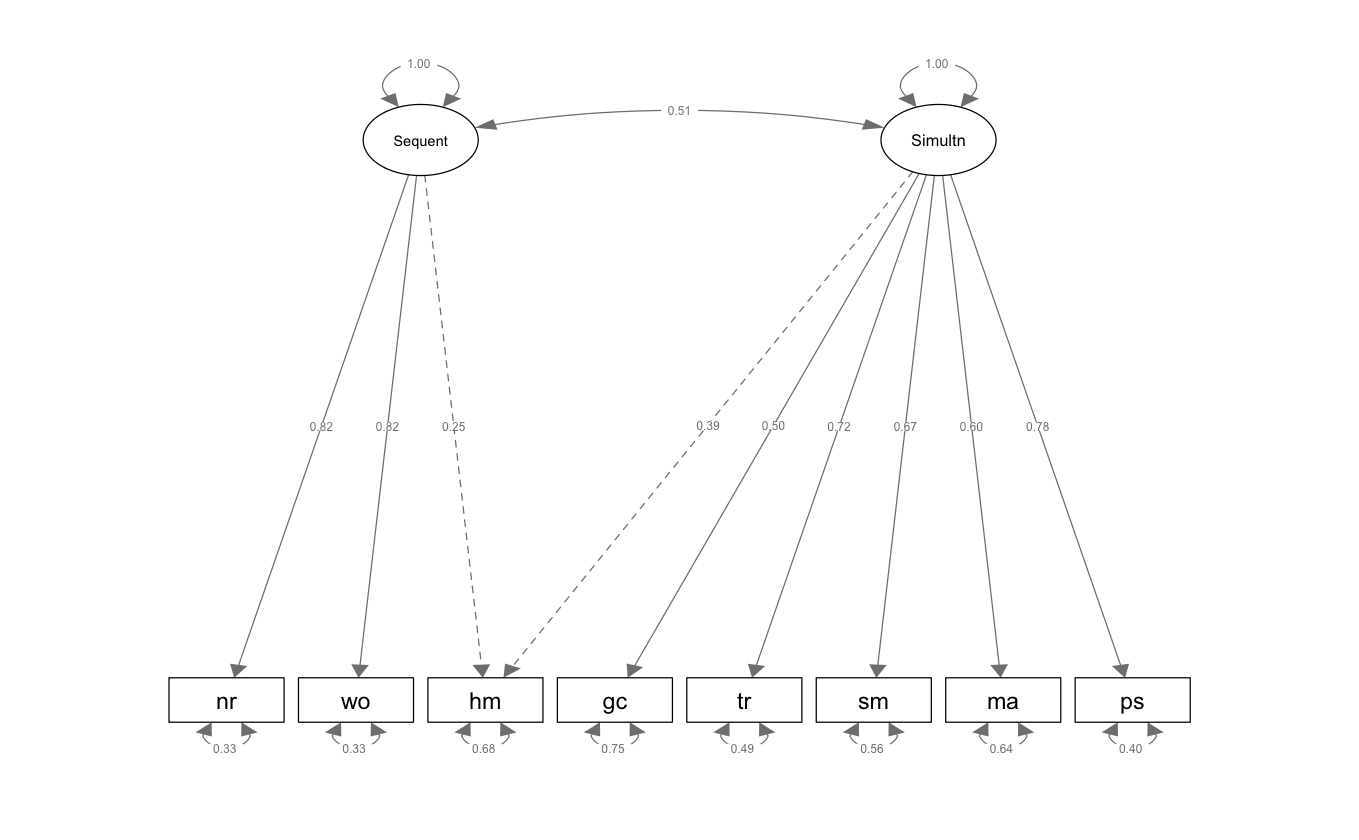

In [29]:
semPlot::semPaths(kabc3,
    what = "col", whatLabels = "std", style = "mx",
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

Nei modelli precedenti, abbiamo utilizzato un metodo di scalatura dei fattori comuni che fissava la saturazione fattoriale di uno degli indicatori di ciascun fattore comune a 1.0 come punto di riferimento. Ora esamineremo un diverso approccio di scalatura basato sulla standardizzazione della varianza delle variabili latenti.

Per implementare questa procedura in `lavaan`, è necessario specificare che la saturazione fattoriale del primo indicatore di ciascun fattore comune deve essere stimata. Poiché di default questa saturazione è fissata a 1.0, dobbiamo utilizzare la sintassi `NA*` per indicare che desideriamo che venga stimata nell'istruzione che definisce la relazione tra le variabili latenti e gli indicatori (`=~`). Inoltre, è necessario specificare che la varianza delle variabili latenti deve essere fissata a 1.0, il che si ottiene mediante la sintassi `1*` nell'istruzione che definisce la varianza di ciascun fattore comune (`~~`).

In [30]:
kabc3alt_model <- "
    Sequent =~ NA*hm + nr + wo
    Simultan =~ NA*hm + gc + tr + sm + ma + ps

    Sequent ~~ 1*Sequent
    Simultan ~~ 1*Simultan
"

Adattiamo il modello così parametrizzato ai dati.

In [31]:
kabc3alt <- lavaan::sem(
    kabc3alt_model, sample.cov = kabc.cov, sample.nobs = 200, std.lv = TRUE
)

Esaminiamo la soluzione non standardizzata.

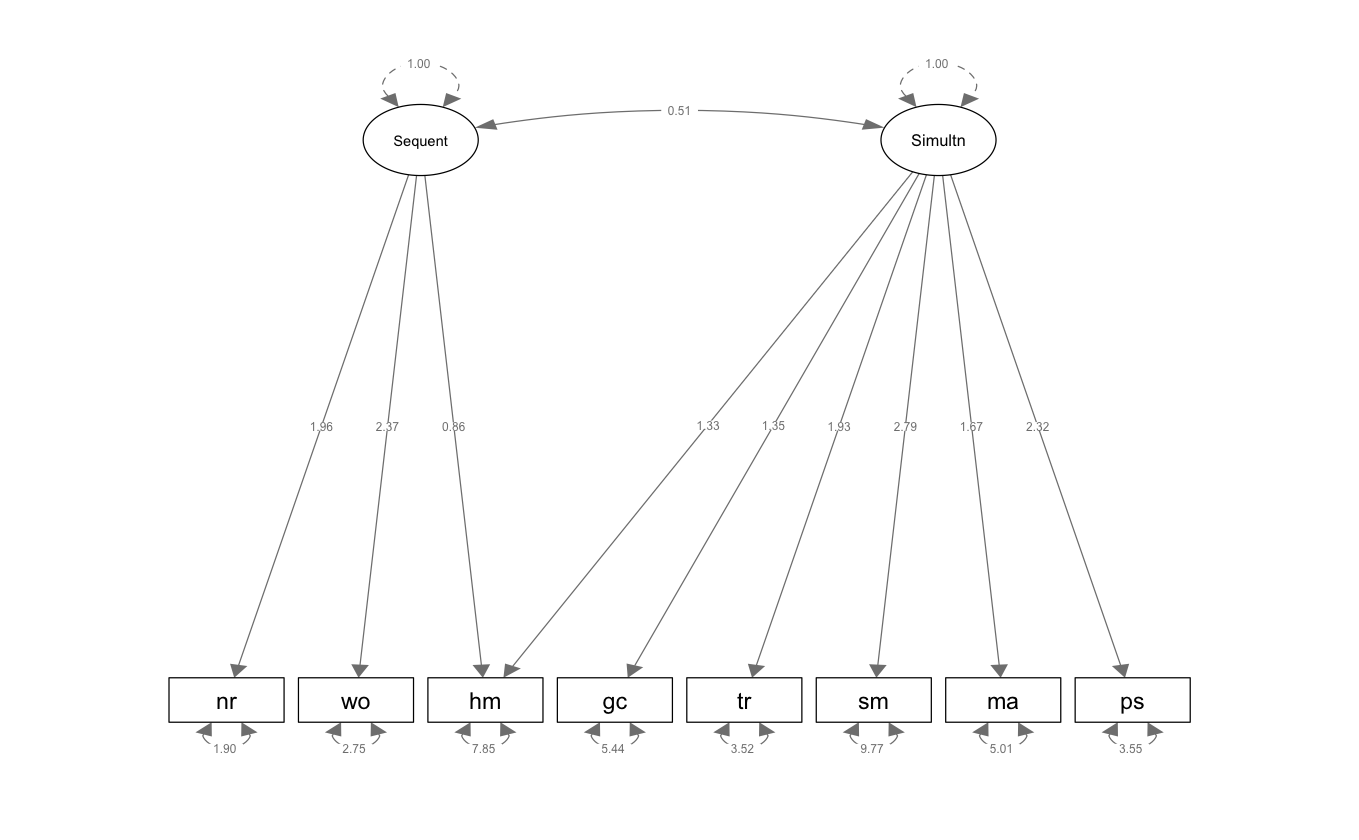

In [32]:
semPlot::semPaths(kabc3alt,
    what = "col", whatLabels = "par", style = "mx", 
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

Esaminiamo la soluzione stanardizzata.

In [33]:
loadings <- standardizedSolution(kabc3alt)
loadings

lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sequent,=~,hm,0.2525843,0.08220772,3.072513,2.122649e-03,0.09146008,0.4137084
Sequent,=~,nr,0.8177223,0.05332042,15.336006,0.000000e+00,0.71321623,0.9222284
Sequent,=~,wo,0.8193488,0.05332369,15.365569,0.000000e+00,0.71483633,0.9238614
Simultan,=~,hm,0.3911092,0.07920463,4.937959,7.894445e-07,0.23587098,0.5463474
Simultan,=~,gc,0.4995384,0.06083464,8.211414,2.220446e-16,0.38030467,0.6187721
Simultan,=~,tr,0.7173674,0.04430383,16.191995,0.000000e+00,0.63053351,0.8042013
Simultan,=~,sm,0.6659822,0.04841876,13.754631,0.000000e+00,0.57108320,0.7608813
Simultan,=~,ma,0.5978175,0.05378959,11.114002,0.000000e+00,0.49239189,0.7032432
Simultan,=~,ps,0.7766261,0.03976255,19.531596,0.000000e+00,0.69869292,0.8545593


In [34]:
relevant_loadings <- loadings[loadings$op == "=~", c("lhs", "rhs", "est.std")]
relevant_loadings

,lhs,rhs,est.std
,<chr>,<chr>,<dbl>
1,Sequent,hm,0.2525843
2,Sequent,nr,0.8177223
3,Sequent,wo,0.8193488
4,Simultan,hm,0.3911092
5,Simultan,gc,0.4995384
6,Simultan,tr,0.7173674
7,Simultan,sm,0.6659822
8,Simultan,ma,0.5978175
9,Simultan,ps,0.7766261


Idealmente, un fattore dovrebbe spiegare almeno il 50% della varianza in un indicatore continuo per sostenere l'ipotesi di validità convergente (Bagozzi & Yi, 2012). Questo significa che, idealmente, tutti gli indicatori di un fattore dovrebbero mostrare un risultato in cui il fattore spiega la maggioranza della loro varianza. Un criterio meno stringente per valutare la validità convergente è l'utilizzo della Varianza Media Estratta (AVE), che è la media dei quadrati dei carichi fattoriali standardizzati per tutti gli indicatori di un dato fattore. Un AVE superiore a 0.50 indica che, in media, il fattore comune spiega più varianza rispetto a quella residua nei termini di errore dell'indicatore, come suggerito da Hair e altri nel 2022.

Nel modello a due fattori esaminato nella Tabella 14.3, i risultati sono problematici secondo il primo standard: il modello non spiega la maggioranza della varianza (R^2 > 0.50) per quattro degli otto indicatori, ovvero per metà di essi. Tuttavia, utilizzando il criterio AVE, i risultati sono leggermente migliori per il fattore sequenziale, che spiega in media circa il 52% della varianza dei suoi tre indicatori (AVE = 0.517).

Tuttavia, nella pratica reale, valori di R^2 inferiori sono spesso accettabili nell'analisi fattoriale. Ad esempio, Comrey e Lee (1992) hanno proposto la seguente scala graduata di valutazione: un R^2 superiore a 0.50 è considerato eccellente, mentre valori approssimativamente uguali a 0.40, 0.30, 0.20 e 0.10 sono classificati come molto buoni, buoni, sufficienti e scarsi, rispettivamente. Seguendo queste linee guida più flessibili, i risultati per gli indicatori nel modello CFA a due fattori della KABC-I sono "eccellenti" (R^2 > 0.50) per tre degli otto indicatori, nessuno è classificato come "scarso" (R^2 intorno a 0.10), e i restanti cinque indicatori mostrano valori intermedi. È importante sottolineare che queste linee guida non dovrebbero essere applicate in modo indiscriminato in tutti i contesti di CFA o con tutti i tipi di indicatori. Gli indicatori continui, come i punteggi totali nell'esempio citato, tendono ad avere carichi fattoriali più elevati rispetto agli indicatori ordinali, come quelli basati su scale di risposta di tipo Likert. La CFA a livello categoriale sarà trattata più dettagliatamente in un capitolo successivo.

## Considerazioni Finali

La CFA è una tecnica fondamentale nell'ambito della ricerca psicologica e sociale, essenziale per esaminare modelli di misurazione riflessiva in cui i fattori comuni fungono da proxy per variabili teoriche. Questa tecnica si basa su un approccio predeterminato, richiedendo al ricercatore di specificare a priori il numero di fattori, la corrispondenza tra fattori e indicatori, e gli eventuali schemi di covarianza degli errori. Nei modelli CFA di base, gli indicatori continui dipendono da un singolo fattore e presentano errori indipendenti, configurando una misurazione unidimensionale. La valutazione di tali modelli con molteplici fattori consente di testare le ipotesi di validità convergente e discriminante.

È anche possibile esaminare modelli CFA con covarianze di errore o indicatori che saturano su più di un fattore. Tuttavia, confrontarsi con tali modelli risulta più complesso, specialmente nella determinazione della loro identificazione, rispetto ai modelli di base. Problemi tecnici come la non convergenza o soluzioni inammissibili sono più frequenti in campioni ridotti, in particolare quando alcuni fattori sono definiti da soli due indicatori. La rielaborazione del modello può essere impegnativa, data la vasta gamma di possibili modifiche applicabili a un modello CFA specifico.

Un'ulteriore problematica riguarda i modelli CFA equivalenti, che possono portare a risultati simili nonostante strutture diverse. Per affrontare efficacemente queste sfide, è fondamentale basarsi più su conoscenze sostanziali che su considerazioni statistiche. L'analisi dovrebbe essere guidata da una solida comprensione del dominio di studio. In definitiva, mentre la CFA offre strumenti potenti per l'indagine dei costrutti teorici, la sua efficacia dipende fortemente dal contesto teorico e dalla competenza metodologica del ricercatore.